In [3]:
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sys import ps2
from utils import *

In [4]:
tools = ['optitype','hlahd','arcas','phlat','rna2hla','seq2hla','hlaforest','hlavbseq']
my_order=["Optitype","HLA-HD","arcasHLA","PHLAT","RNA2HLA","seq2HLA","HLAforest","HLA-vbseq"]

sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("white")

NameError: name 'sns' is not defined

# Create accuracy dataframe

In [3]:
rls = [36,51,76]
gs = pd.read_csv('../datasets/readlength_gs.csv')

data = []

for tool in tools:
    for rl in rls:
        filepath = f'../results/read_length/standard/{tool}_{str(rl)}.csv'
        pre = pd.read_csv(filepath)
        ret = np.array(get_accuracy_counts(pre,gs))
        ret = ret[:3] # comment out this line to consider no-call
        total = sum(sum(ret))

        # add 
        data.append([tool,rl,sum(ret[1])/total+sum(ret[2])/total,sum(ret[2])/total] ) # not considering classes (not enough data).. so sum it
    

In [4]:
# get means
short1, med1, long1 = 0,0,0
short2, med2, long2 = 0,0,0

tot = 7 # change to total # tools

for d in data:
    if d[1] == 36:
        short1 += d[2]/tot
        short2 += d[3]/tot
    if d[1] == 51:
        med1 += d[2]/tot
        med2 += d[3]/tot
    if d[1] == 76:
        long1 += d[2]/tot
        long2 += d[3]/tot
#     if d[1] == 76:
#         xl1 += d[2]/tot
#         xl2 += d[3]/tot
#     if d[1] == 76:
#         xxl1 += d[2]/tot
#         xxl2 += d[3]/tot

In [9]:
df = pd.DataFrame(data,columns=['tool','read length','one field accuracy','two field accuracy'])
print(df)


         tool  read length  one field accuracy  two field accuracy
0    optitype           36            1.000000            1.000000
1    optitype           51            1.000000            1.000000
2    optitype           76            1.000000            1.000000
3       hlahd           36            0.960000            0.580000
4       hlahd           51            0.961538            0.865385
5       hlahd           76            0.961538            0.884615
6       arcas           36            0.958333            0.708333
7       arcas           51            0.960000            0.840000
8       arcas           76            0.980000            0.960000
9       phlat           36            0.851852            0.611111
10      phlat           51            0.807692            0.711538
11      phlat           76            0.884615            0.865385
12    rna2hla           36            0.760870            0.630435
13    rna2hla           51            0.847826            0.73

# Plot

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
tool_names=tools

(0.0, 1.0)

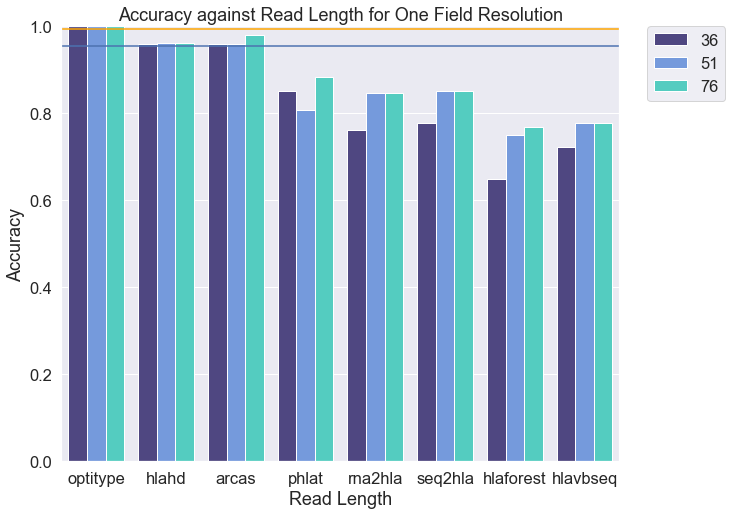

In [19]:
plt.figure(figsize=(10,8))

ax=sns.barplot(x = "tool", y = "one field accuracy", data=df,hue="read length",palette=['darkslateblue','cornflowerblue','turquoise'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy against Read Length for One Field Resolution") 


plt.axhline(y=short1, color='darkslateblue', linestyle='-')
plt.axhline(y=med1, color='cornflowerblue', linestyle='-')
plt.axhline(y=long1, color='turquoise', linestyle='-')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_2dig.png',bbox_inches ="tight",dpi=300)

(0.0, 1.0)

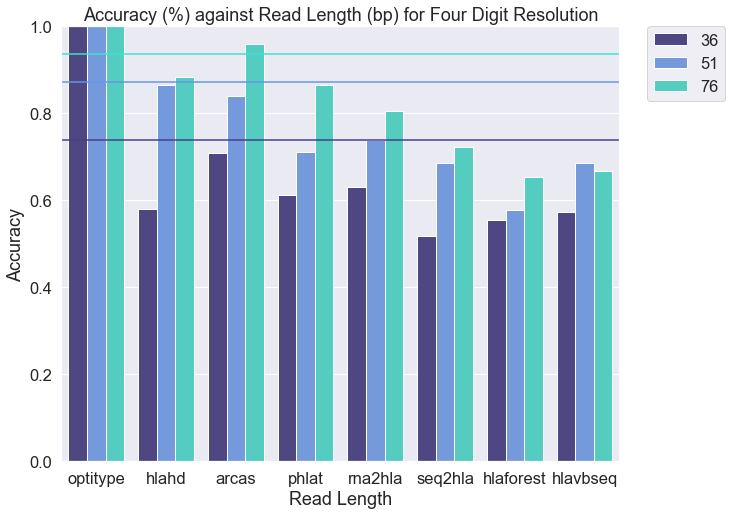

In [21]:
plt.figure(figsize=(10,8))

ax=sns.barplot(x = "tool", y = "two field accuracy", data=df,hue="read length",palette=['darkslateblue','cornflowerblue','turquoise'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy (%) against Read Length (bp) for Four Digit Resolution") 

# annotate mean lines
plt.axhline(y=short2, color='darkslateblue', linestyle='-')
plt.axhline(y=med2, color='cornflowerblue', linestyle='-')
plt.axhline(y=long2, color='turquoise', linestyle='-')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_4dig.png',bbox_inches ="tight",dpi=300)